**Data source** : [Studienanfänger: Bundesländer, Semester, Nationalität,Geschlecht](https://www.govdata.de/web/guest/suchen/-/details/studienanfanger-bundeslander-semester-nationalitatgeschlecht)

# **Project Summary**


Examining the linked data set about the number of students starting
their studies in Germany in the winter semester of every year from 1998-1999 to
2021-2022 in each state.
The data includes information about the total number of German and
international students, male and female.
Interesting questions to tackle :
1. Has the COVID pandemic caused any drop in the number of
international students ? Answered in Conclusion 1 and 3
2. Has the 2017-2018 unique law in Baden-Wuerttemberg regarding
introducing a 1500 Euro fee for international students decreased the
number of students in comparison to previous years ? Answered in Conclusion 2
3. Which of the German states has the highest proportion of international
students ? Answered in Conclusion 5
4. Which of the German states has the highest proportion of German
students ? Answered in Conclusion 6



# **1.1 Preparing Data**

**To skip to results, see section below: '1.2 Clean data'**

In [43]:
import pandas as pd

df = pd.read_csv('/content/21311-0014_00.csv', names=['1', '2', '3', '4', '5', '6'], encoding= 'unicode_escape',  delimiter=' ')

df

,1,2,3,4,5,6
0,Baden-Württemberg;WS,1998/99;12966;10170;23136;2580;2878;5458;15546...,NaN,NaN,NaN,NaN
1,Baden-Württemberg;WS,1999/00;13775;11988;25763;3337;3409;6746;17112...,NaN,NaN,NaN,NaN
2,Baden-Württemberg;WS,2000/01;15696;13391;29087;3580;3702;7282;19276...,NaN,NaN,NaN,NaN
3,Baden-Württemberg;WS,2001/02;17040;14816;31856;3894;4146;8040;20934...,NaN,NaN,NaN,NaN
4,Baden-Württemberg;WS,2002/03;16670;15542;32212;4252;4478;8730;20922...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
382,Thüringen;WS,2020/21;5117;9450;14567;1467;1747;3214;6584;11...,NaN,NaN,NaN,NaN
383,Thüringen;WS,2021/22;5556;10167;15723;1907;2205;4112;7463;1...,NaN,NaN,NaN,NaN
384,__________,NaN,NaN,NaN,NaN,NaN
385,©,Statistisches,Bundesamt,"(Destatis),",2022.0,NaN


In [44]:
df2 = df['2'].apply(lambda x: pd.Series(str(x).split(";")))
df2



,0,1,2,3,4,5,6,7,8,9
0,1998/99,12966,10170,23136,2580,2878,5458,15546,13048,28594
1,1999/00,13775,11988,25763,3337,3409,6746,17112,15397,32509
2,2000/01,15696,13391,29087,3580,3702,7282,19276,17093,36369
3,2001/02,17040,14816,31856,3894,4146,8040,20934,18962,39896
4,2002/03,16670,15542,32212,4252,4478,8730,20922,20020,40942
...,...,...,...,...,...,...,...,...,...,...
382,2020/21,5117,9450,14567,1467,1747,3214,6584,11197,17781
383,2021/22,5556,10167,15723,1907,2205,4112,7463,12372,19835
384,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385,Statistisches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df2.columns = ['Year', 'german_male', 'german_female', 'german_total', 'foreign_male', 'foreign_female', 'foreign_total', 'total_male', 'total_female', 'Total']
df2

,Year,german_male,german_female,german_total,foreign_male,foreign_female,foreign_total,total_male,total_female,Total
0,1998/99,12966,10170,23136,2580,2878,5458,15546,13048,28594
1,1999/00,13775,11988,25763,3337,3409,6746,17112,15397,32509
2,2000/01,15696,13391,29087,3580,3702,7282,19276,17093,36369
3,2001/02,17040,14816,31856,3894,4146,8040,20934,18962,39896
4,2002/03,16670,15542,32212,4252,4478,8730,20922,20020,40942
...,...,...,...,...,...,...,...,...,...,...
382,2020/21,5117,9450,14567,1467,1747,3214,6584,11197,17781
383,2021/22,5556,10167,15723,1907,2205,4112,7463,12372,19835
384,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385,Statistisches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
df2[['Year','Year2']] = df2['Year'].apply(lambda x: pd.Series(str(x).split("/")))
df2


,Year,german_male,german_female,german_total,foreign_male,foreign_female,foreign_total,total_male,total_female,Total,Year2
0,1998,12966,10170,23136,2580,2878,5458,15546,13048,28594,99
1,1999,13775,11988,25763,3337,3409,6746,17112,15397,32509,00
2,2000,15696,13391,29087,3580,3702,7282,19276,17093,36369,01
3,2001,17040,14816,31856,3894,4146,8040,20934,18962,39896,02
4,2002,16670,15542,32212,4252,4478,8730,20922,20020,40942,03
...,...,...,...,...,...,...,...,...,...,...,...
382,2020,5117,9450,14567,1467,1747,3214,6584,11197,17781,21
383,2021,5556,10167,15723,1907,2205,4112,7463,12372,19835,22
384,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385,Statistisches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
df2.drop(['Year2'], axis = 1, inplace = True, errors = 'ignore')
df2

,Year,german_male,german_female,german_total,foreign_male,foreign_female,foreign_total,total_male,total_female,Total
0,1998,12966,10170,23136,2580,2878,5458,15546,13048,28594
1,1999,13775,11988,25763,3337,3409,6746,17112,15397,32509
2,2000,15696,13391,29087,3580,3702,7282,19276,17093,36369
3,2001,17040,14816,31856,3894,4146,8040,20934,18962,39896
4,2002,16670,15542,32212,4252,4478,8730,20922,20020,40942
...,...,...,...,...,...,...,...,...,...,...
382,2020,5117,9450,14567,1467,1747,3214,6584,11197,17781
383,2021,5556,10167,15723,1907,2205,4112,7463,12372,19835
384,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385,Statistisches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
df2.drop(df2.tail(3).index,inplace=True) # drop last n rows
df2

,Year,german_male,german_female,german_total,foreign_male,foreign_female,foreign_total,total_male,total_female,Total
0,1998,12966,10170,23136,2580,2878,5458,15546,13048,28594
1,1999,13775,11988,25763,3337,3409,6746,17112,15397,32509
2,2000,15696,13391,29087,3580,3702,7282,19276,17093,36369
3,2001,17040,14816,31856,3894,4146,8040,20934,18962,39896
4,2002,16670,15542,32212,4252,4478,8730,20922,20020,40942
...,...,...,...,...,...,...,...,...,...,...
379,2017,3287,3682,6969,1157,1005,2162,4444,4687,9131
380,2018,3077,3709,6786,1120,1001,2121,4197,4710,8907
381,2019,4180,6150,10330,1622,1577,3199,5802,7727,13529
382,2020,5117,9450,14567,1467,1747,3214,6584,11197,17781


In [49]:
df.drop(df.tail(3).index,inplace=True) # drop last n rows
df

,1,2,3,4,5,6
0,Baden-Württemberg;WS,1998/99;12966;10170;23136;2580;2878;5458;15546...,NaN,NaN,NaN,NaN
1,Baden-Württemberg;WS,1999/00;13775;11988;25763;3337;3409;6746;17112...,NaN,NaN,NaN,NaN
2,Baden-Württemberg;WS,2000/01;15696;13391;29087;3580;3702;7282;19276...,NaN,NaN,NaN,NaN
3,Baden-Württemberg;WS,2001/02;17040;14816;31856;3894;4146;8040;20934...,NaN,NaN,NaN,NaN
4,Baden-Württemberg;WS,2002/03;16670;15542;32212;4252;4478;8730;20922...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
379,Thüringen;WS,2017/18;3287;3682;6969;1157;1005;2162;4444;468...,NaN,NaN,NaN,NaN
380,Thüringen;WS,2018/19;3077;3709;6786;1120;1001;2121;4197;471...,NaN,NaN,NaN,NaN
381,Thüringen;WS,2019/20;4180;6150;10330;1622;1577;3199;5802;77...,NaN,NaN,NaN,NaN
382,Thüringen;WS,2020/21;5117;9450;14567;1467;1747;3214;6584;11...,NaN,NaN,NaN,NaN


In [50]:
df.drop(['2', '3', '4', '5', '6'], axis = 1, inplace = True, errors = 'ignore')
df

,1
0,Baden-Württemberg;WS
1,Baden-Württemberg;WS
2,Baden-Württemberg;WS
3,Baden-Württemberg;WS
4,Baden-Württemberg;WS
...,...
379,Thüringen;WS
380,Thüringen;WS
381,Thüringen;WS
382,Thüringen;WS


In [51]:
df[['State','Semester']] = df['1'].apply(lambda x: pd.Series(str(x).split(";")))
df

,1,State,Semester
0,Baden-Württemberg;WS,Baden-Württemberg,WS
1,Baden-Württemberg;WS,Baden-Württemberg,WS
2,Baden-Württemberg;WS,Baden-Württemberg,WS
3,Baden-Württemberg;WS,Baden-Württemberg,WS
4,Baden-Württemberg;WS,Baden-Württemberg,WS
...,...,...,...
379,Thüringen;WS,Thüringen,WS
380,Thüringen;WS,Thüringen,WS
381,Thüringen;WS,Thüringen,WS
382,Thüringen;WS,Thüringen,WS


In [52]:
states = df['State']
states

0      Baden-Württemberg
1      Baden-Württemberg
2      Baden-Württemberg
3      Baden-Württemberg
4      Baden-Württemberg
             ...        
379            Thüringen
380            Thüringen
381            Thüringen
382            Thüringen
383            Thüringen
Name: State, Length: 384, dtype: object

# **1.2 Clean data**

In [53]:
#states.join(df2)
clean = pd.concat([states, df2], axis=1)
clean

,State,Year,german_male,german_female,german_total,foreign_male,foreign_female,foreign_total,total_male,total_female,Total
0,Baden-Württemberg,1998,12966,10170,23136,2580,2878,5458,15546,13048,28594
1,Baden-Württemberg,1999,13775,11988,25763,3337,3409,6746,17112,15397,32509
2,Baden-Württemberg,2000,15696,13391,29087,3580,3702,7282,19276,17093,36369
3,Baden-Württemberg,2001,17040,14816,31856,3894,4146,8040,20934,18962,39896
4,Baden-Württemberg,2002,16670,15542,32212,4252,4478,8730,20922,20020,40942
...,...,...,...,...,...,...,...,...,...,...,...
379,Thüringen,2017,3287,3682,6969,1157,1005,2162,4444,4687,9131
380,Thüringen,2018,3077,3709,6786,1120,1001,2121,4197,4710,8907
381,Thüringen,2019,4180,6150,10330,1622,1577,3199,5802,7727,13529
382,Thüringen,2020,5117,9450,14567,1467,1747,3214,6584,11197,17781


**Manipulating the index to get a 2-dimensional dataframe for the Total number of students (German + Foreign)**

In [54]:
stack = clean.groupby(['State', 'Year'])['Total'].sum()

stack

State              Year
Baden-Württemberg  1998    28594
                   1999    32509
                   2000    36369
                   2001    39896
                   2002    40942
                           ...  
Thüringen          2017     9131
                   2018     8907
                   2019    13529
                   2020    17781
                   2021    19835
Name: Total, Length: 384, dtype: object

In [55]:
total = stack.unstack(0)
total

State,Baden-Württemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thüringen
Year,,,,,,,,,,,,,,,,
1998,28594,33133,14438,5413,3302,6748,16935,4665,18976,52739,9990,2765,15099,6403,5127,6343
1999,32509,35670,15199,5970,3787,7238,18039,5191,19637,54173,10808,2760,15953,7012,5259,7113
2000,36369,38215,16064,6633,4279,7568,19549,5411,21720,58178,12008,3004,16845,7422,5881,8149
2001,39896,41826,17522,7203,5161,7848,21971,5024,24367,64878,13024,3270,17951,7650,6573,8392
2002,40942,43186,17205,6898,5222,9021,23278,5159,24724,66397,13114,3428,18534,7437,6690,8414
2003,43453,46446,16795,7374,5503,8824,25984,6457,26063,68009,12466,3619,20184,9906,6849,8724
2004,40588,44712,15600,7040,5429,8350,24777,6555,23235,65389,12511,3229,18853,9409,6656,8460
2005,39979,45809,15840,6840,5129,8416,25000,5700,22250,67786,12152,3410,18316,7806,6853,8553
2006,39254,47375,16793,6983,4779,8602,23698,5945,21736,63346,12602,3339,17343,7824,6733,8594


# **2.1 Effect of COVID-19 on foreign student numbers in 2020**

**Manipulating the index to get a 2-dimensional dataframe for the *foreign_total* number of students**

In [56]:
foreign = clean.groupby(['State', 'Year'])['foreign_total'].sum()
foreign
foreign_unstacked = foreign.unstack(0)
foreign_unstacked

State,Baden-Württemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thüringen
Year,,,,,,,,,,,,,,,,
1998,5458,4508,2707,754,378,1034,2649,282,2472,7762,1559,672,1512,465,524,462
1999,6746,4976,3063,970,533,1181,2893,400,2647,7704,1802,649,1574,628,549,580
2000,7282,5714,3259,1347,646,1188,3245,363,3143,8454,1850,652,1684,666,643,621
2001,8040,6708,3801,1689,888,1170,3580,500,3665,9725,2164,713,2084,855,727,654
2002,8730,6773,3948,1332,906,1645,3878,656,3891,9949,2166,763,2334,1009,776,840
2003,9082,6728,4064,1379,1084,1587,4130,740,3899,10141,2140,800,2644,1158,790,975
2004,8396,6598,4295,1261,1104,1531,3889,732,3595,9309,2049,773,2742,1231,752,885
2005,8023,6698,4413,1407,1021,1395,3699,680,3338,9304,1902,769,2673,979,713,826
2006,7751,6927,4699,1315,1014,1399,3578,696,3038,9236,2036,779,2818,983,686,949


# **2.2 Conclusion**

**foreign student numbers dropping in 2020 due to COVID**

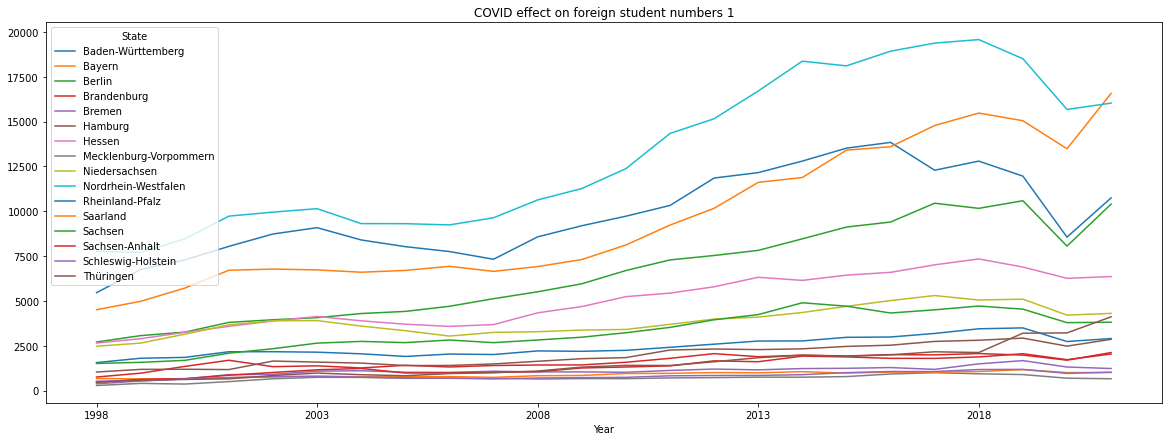

In [57]:
foreign_unstacked.astype(float).plot(figsize=(20,7), title='COVID effect on foreign student numbers 1')

# **3.1 Effect of Baden-Württemberg tuition fees for non-EU students**

In [58]:
foreign_unstacked['Berlin']['2000']

'3259'

In [59]:
comparison = foreign.groupby(['Year', 'State']).sum()
comparison_unstacked = comparison.unstack(0)
comparison_unstacked

Year,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
State,,,,,,,,,,,,,,,,,,,,,
Baden-Württemberg,5458,6746,7282,8040,8730,9082,8396,8023,7751,7321,...,11849,12151,12794,13515,13837,12285,12792,11956,8555,10743
Bayern,4508,4976,5714,6708,6773,6728,6598,6698,6927,6646,...,10161,11608,11878,13404,13596,14777,15473,15045,13479,16568
Berlin,2707,3063,3259,3801,3948,4064,4295,4413,4699,5122,...,7530,7816,8459,9116,9396,10445,10159,10584,8053,10396
Brandenburg,754,970,1347,1689,1332,1379,1261,1407,1315,1397,...,2059,1886,1973,1929,2003,1989,2064,1978,1695,2120
Bremen,378,533,646,888,906,1084,1104,1021,1014,1077,...,1198,1155,1226,1241,1282,1182,1489,1670,1313,1229
Hamburg,1034,1181,1188,1170,1645,1587,1531,1395,1399,1484,...,2316,2284,2327,2461,2529,2740,2805,2925,2476,2858
Hessen,2649,2893,3245,3580,3878,4130,3889,3699,3578,3679,...,5786,6316,6143,6435,6591,7010,7339,6887,6258,6356
Mecklenburg-Vorpommern,282,400,363,500,656,740,732,680,696,689,...,722,748,744,779,923,996,934,892,689,659
Niedersachsen,2472,2647,3143,3665,3891,3899,3595,3338,3038,3243,...,3986,4096,4352,4696,5018,5298,5048,5096,4207,4303


In [60]:
sumyear = comparison_unstacked['1998'].astype(float).sum()
sumyear

33198.0

In [61]:
comparison_unstacked.groupby('State')['1998'].sum()

State
Baden-Württemberg         5458
Bayern                    4508
Berlin                    2707
Brandenburg                754
Bremen                     378
Hamburg                   1034
Hessen                    2649
Mecklenburg-Vorpommern     282
Niedersachsen             2472
Nordrhein-Westfalen       7762
Rheinland-Pfalz           1559
Saarland                   672
Sachsen                   1512
Sachsen-Anhalt             465
Schleswig-Holstein         524
Thüringen                  462
Name: 1998, dtype: object

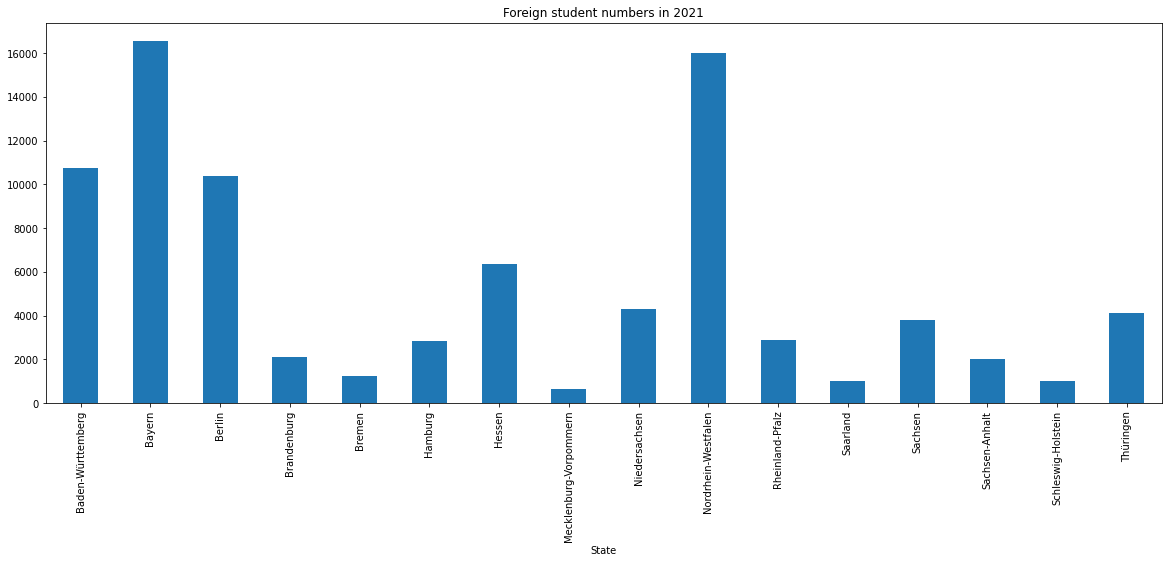

In [62]:
ax = comparison['2021'].astype(float).plot.bar(figsize=(20,7), title='Foreign student numbers in 2021')


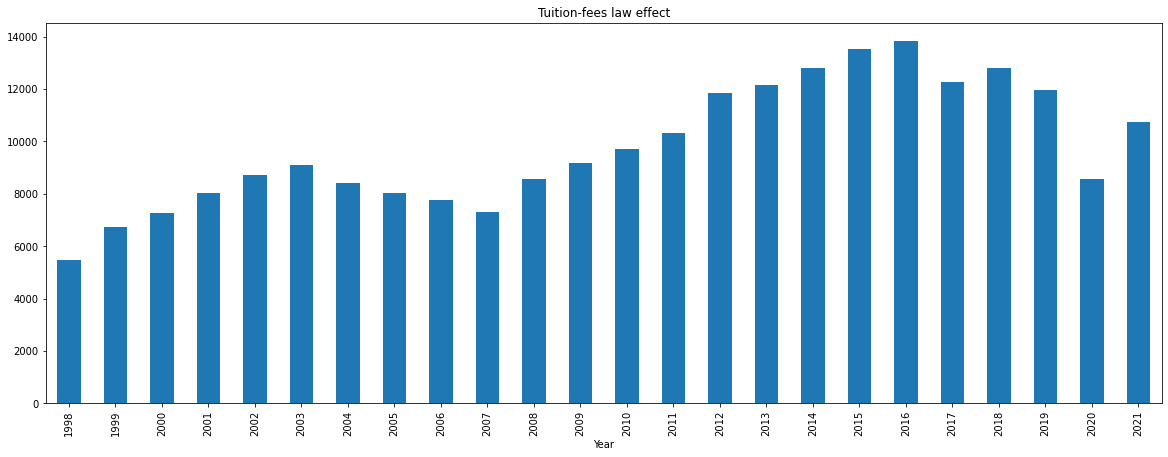

In [63]:
bw = foreign['Baden-Württemberg'].astype(int)
bw.plot.bar(figsize=(20,7), title='Tuition-fees law effect')
#furthermore : we can also see the numbers of foreign students in BW DROPPING IN 2017! up in 2018 and down again 2019! definitely effected. the curve is clear. 

#**3.2 Conclusion**

**Here we notice the drop in foreign student numbers following the law introducing 1500 Euro semester fees for non-EU students in Year 2017**

# **4.1 2nd plot COVID 19 effect on foreign student num in Year 2020.** 

In [64]:
german = clean.groupby(['State', 'Year'])['german_total'].sum()
german
german.unstack(0)
#here we notice COVID 19 effect in Year 2020. NO DIFFERENCE.

State,Baden-Württemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thüringen
Year,,,,,,,,,,,,,,,,
1998,23136,28625,11731,4659,2924,5714,14286,4383,16504,44977,8431,2093,13587,5938,4603,5881
1999,25763,30694,12136,5000,3254,6057,15146,4791,16990,46469,9006,2111,14379,6384,4710,6533
2000,29087,32501,12805,5286,3633,6380,16304,5048,18577,49724,10158,2352,15161,6756,5238,7528
2001,31856,35118,13721,5514,4273,6678,18391,4524,20702,55153,10860,2557,15867,6795,5846,7738
2002,32212,36413,13257,5566,4316,7376,19400,4503,20833,56448,10948,2665,16200,6428,5914,7574
2003,34371,39718,12731,5995,4419,7237,21854,5717,22164,57868,10326,2819,17540,8748,6059,7749
2004,32192,38114,11305,5779,4325,6819,20888,5823,19640,56080,10462,2456,16111,8178,5904,7575
2005,31956,39111,11427,5433,4108,7021,21301,5020,18912,58482,10250,2641,15643,6827,6140,7727
2006,31503,40448,12094,5668,3765,7203,20120,5249,18698,54110,10566,2560,14525,6841,6047,7645


# **4.2 Conclusion**

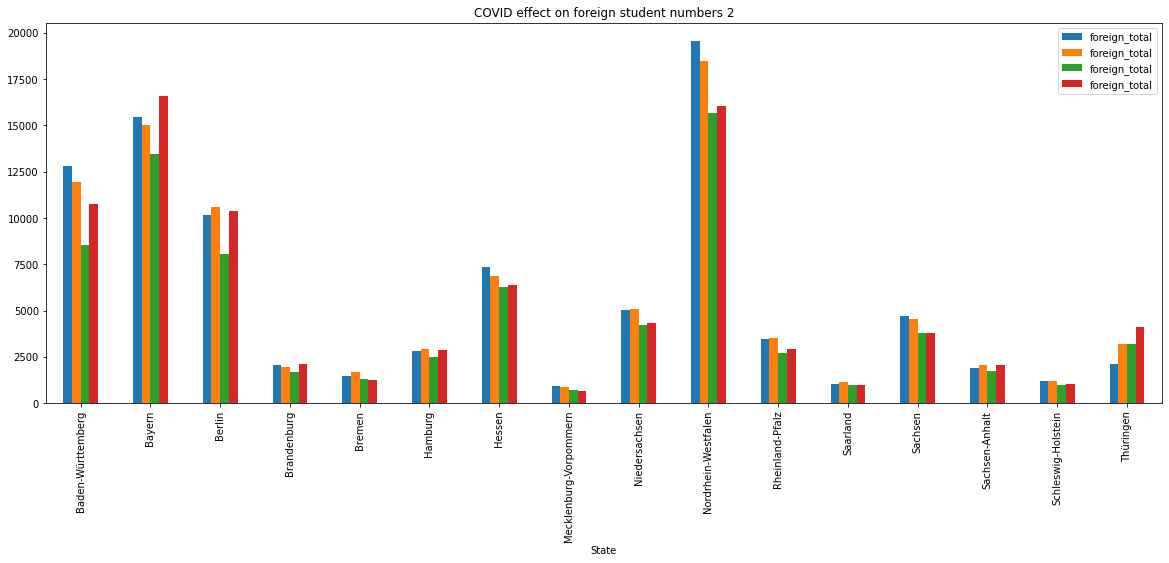

In [65]:
df2018 = pd.DataFrame(data=comparison['2018'].astype(int))
df2019 = pd.DataFrame(data=comparison['2019'].astype(int))
df2020 = pd.DataFrame(data=comparison['2020'].astype(int))
df2021 = pd.DataFrame(data=comparison['2021'].astype(int))

dftotal = pd.concat([df2018, df2019, df2020, df2021], axis=1)
dftotal.plot.bar(figsize=(20,7), title='COVID effect on foreign student numbers 2')

# **Normalising the Data**

# **5.1 State with highest ratio of international students**

In [66]:
foreign['Berlin'].astype(float)/total['Berlin'].astype(float)

Year
1998    0.187491
1999    0.201526
2000    0.202876
2001    0.216927
2002    0.229468
2003    0.241977
2004    0.275321
2005    0.278598
2006    0.279819
2007    0.274918
2008    0.288672
2009    0.288448
2010    0.299004
2011    0.299926
2012    0.303690
2013    0.319477
2014    0.332612
2015    0.341347
2016    0.343735
2017    0.366929
2018    0.357007
2019    0.376400
2020    0.312677
2021    0.372510
dtype: float64

In [67]:
total.columns.values.tolist()

['Baden-Württemberg',
 'Bayern',
 'Berlin',
 'Brandenburg',
 'Bremen',
 'Hamburg',
 'Hessen',
 'Mecklenburg-Vorpommern',
 'Niedersachsen',
 'Nordrhein-Westfalen',
 'Rheinland-Pfalz',
 'Saarland',
 'Sachsen',
 'Sachsen-Anhalt',
 'Schleswig-Holstein',
 'Thüringen']

In [68]:
normalised_badenw = (foreign['Baden-Württemberg'].astype(float)/total['Baden-Württemberg'].astype(float)* 100).round(2)
normalised_bayern = (foreign['Bayern'].astype(float)/total['Bayern'].astype(float)* 100).round(2)
normalised_berlin = (foreign['Berlin'].astype(float)/total['Berlin'].astype(float)* 100).round(2)
normalised_brandenburg = (foreign['Brandenburg'].astype(float)/total['Brandenburg'].astype(float)* 100).round(2)
normalised_bremen = (foreign['Bremen'].astype(float)/total['Bremen'].astype(float)* 100).round(2)
normalised_hamburg = (foreign['Hamburg'].astype(float)/total['Hamburg'].astype(float)* 100).round(2)
normalised_hessen = (foreign['Hessen'].astype(float)/total['Hessen'].astype(float)* 100).round(2)
normalised_meckvor = (foreign['Mecklenburg-Vorpommern'].astype(float)/total['Mecklenburg-Vorpommern'].astype(float)* 100).round(2)
normalised_ndsachen = (foreign['Niedersachsen'].astype(float)/total['Niedersachsen'].astype(float)* 100).round(2)
normalised_nrw = (foreign['Nordrhein-Westfalen'].astype(float)/total['Nordrhein-Westfalen'].astype(float)* 100).round(2)
normalised_rhlpf = (foreign['Rheinland-Pfalz'].astype(float)/total['Rheinland-Pfalz'].astype(float)* 100).round(2)
normalised_saar = (foreign['Saarland'].astype(float)/total['Saarland'].astype(float)* 100).round(2)
normalised_sachs = (foreign['Sachsen'].astype(float)/total['Sachsen'].astype(float)* 100).round(2)
normalised_sacshen_anh =(foreign['Sachsen-Anhalt'].astype(float)/total['Sachsen-Anhalt'].astype(float)* 100).round(2)
normalised_schlhol = (foreign['Schleswig-Holstein'].astype(float)/total['Schleswig-Holstein'].astype(float)* 100).round(2)
normalised_thurngn =(foreign['Thüringen'].astype(float)/total['Thüringen'].astype(float)* 100).round(2)


dftotal_nomalised = pd.concat([normalised_badenw, normalised_bayern, normalised_berlin, normalised_brandenburg, normalised_bremen, normalised_hamburg, normalised_hessen, normalised_meckvor, 
                               normalised_ndsachen, normalised_nrw, normalised_rhlpf, normalised_saar, normalised_sachs, normalised_sacshen_anh, normalised_schlhol, normalised_thurngn
                               ], axis=1)
dftotal_nomalised.columns = ['Baden-Württemberg',
 'Bayern',
 'Berlin',
 'Brandenburg',
 'Bremen',
 'Hamburg',
 'Hessen',
 'Mecklenburg-Vorpommern',
 'Niedersachsen',
 'Nordrhein-Westfalen',
 'Rheinland-Pfalz',
 'Saarland',
 'Sachsen',
 'Sachsen-Anhalt',
 'Schleswig-Holstein',
 'Thüringen']

dftotal_nomalised

,Baden-Württemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thüringen
Year,,,,,,,,,,,,,,,,
1998,19.09,13.61,18.75,13.93,11.45,15.32,15.64,6.05,13.03,14.72,15.61,24.30,10.01,7.26,10.22,7.28
1999,20.75,13.95,20.15,16.25,14.07,16.32,16.04,7.71,13.48,14.22,16.67,23.51,9.87,8.96,10.44,8.15
2000,20.02,14.95,20.29,20.31,15.10,15.70,16.60,6.71,14.47,14.53,15.41,21.70,10.00,8.97,10.93,7.62
2001,20.15,16.04,21.69,23.45,17.21,14.91,16.29,9.95,15.04,14.99,16.62,21.80,11.61,11.18,11.06,7.79
2002,21.32,15.68,22.95,19.31,17.35,18.24,16.66,12.72,15.74,14.98,16.52,22.26,12.59,13.57,11.60,9.98
2003,20.90,14.49,24.20,18.70,19.70,17.99,15.89,11.46,14.96,14.91,17.17,22.11,13.10,11.69,11.53,11.18
2004,20.69,14.76,27.53,17.91,20.34,18.34,15.70,11.17,15.47,14.24,16.38,23.94,14.54,13.08,11.30,10.46
2005,20.07,14.62,27.86,20.57,19.91,16.58,14.80,11.93,15.00,13.73,15.65,22.55,14.59,12.54,10.40,9.66
2006,19.75,14.62,27.98,18.83,21.22,16.26,15.10,11.71,13.98,14.58,16.16,23.33,16.25,12.56,10.19,11.04


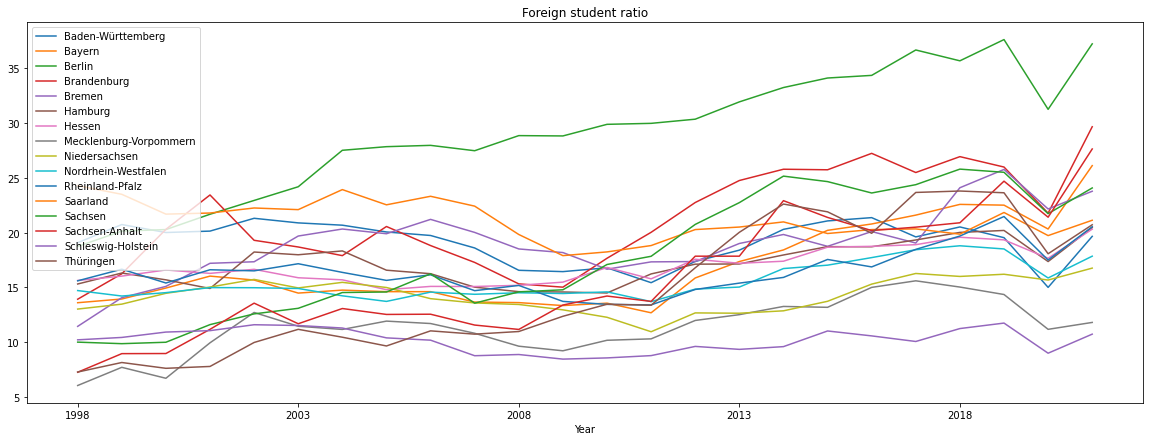

In [69]:
dftotal_nomalised.plot(figsize=(20,7), title='Foreign student ratio')

# **5.2 Conclusion**

**Berlin has consistently had the highest ratio of international students/total students in Germany for 20 years**

Another Approach to normalisation : foreign student numbers per state per year divided by total ***FOREIGN*** student numbers in all states for a specific year

this is actually the correct approach to caclulate popularity, not just getting a simple percentage for state per year (foreign students in state/ total students in state)... that's slightly different isn't it ? a state may have a higher percentage of international students but may not be the most popular foreign student destination judging by overall numbers

# **6.1 State with the highest percentage of international students**

In [70]:
foreign

State              Year
Baden-Württemberg  1998    5458
                   1999    6746
                   2000    7282
                   2001    8040
                   2002    8730
                           ... 
Thüringen          2017    2162
                   2018    2121
                   2019    3199
                   2020    3214
                   2021    4112
Name: foreign_total, Length: 384, dtype: object

In [71]:
foreign.unstack(0)

State,Baden-Württemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thüringen
Year,,,,,,,,,,,,,,,,
1998,5458,4508,2707,754,378,1034,2649,282,2472,7762,1559,672,1512,465,524,462
1999,6746,4976,3063,970,533,1181,2893,400,2647,7704,1802,649,1574,628,549,580
2000,7282,5714,3259,1347,646,1188,3245,363,3143,8454,1850,652,1684,666,643,621
2001,8040,6708,3801,1689,888,1170,3580,500,3665,9725,2164,713,2084,855,727,654
2002,8730,6773,3948,1332,906,1645,3878,656,3891,9949,2166,763,2334,1009,776,840
2003,9082,6728,4064,1379,1084,1587,4130,740,3899,10141,2140,800,2644,1158,790,975
2004,8396,6598,4295,1261,1104,1531,3889,732,3595,9309,2049,773,2742,1231,752,885
2005,8023,6698,4413,1407,1021,1395,3699,680,3338,9304,1902,769,2673,979,713,826
2006,7751,6927,4699,1315,1014,1399,3578,696,3038,9236,2036,779,2818,983,686,949


In [72]:
foreign_unstackyed = foreign.unstack(0)
foreign_unstackyed

State,Baden-Württemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thüringen
Year,,,,,,,,,,,,,,,,
1998,5458,4508,2707,754,378,1034,2649,282,2472,7762,1559,672,1512,465,524,462
1999,6746,4976,3063,970,533,1181,2893,400,2647,7704,1802,649,1574,628,549,580
2000,7282,5714,3259,1347,646,1188,3245,363,3143,8454,1850,652,1684,666,643,621
2001,8040,6708,3801,1689,888,1170,3580,500,3665,9725,2164,713,2084,855,727,654
2002,8730,6773,3948,1332,906,1645,3878,656,3891,9949,2166,763,2334,1009,776,840
2003,9082,6728,4064,1379,1084,1587,4130,740,3899,10141,2140,800,2644,1158,790,975
2004,8396,6598,4295,1261,1104,1531,3889,732,3595,9309,2049,773,2742,1231,752,885
2005,8023,6698,4413,1407,1021,1395,3699,680,3338,9304,1902,769,2673,979,713,826
2006,7751,6927,4699,1315,1014,1399,3578,696,3038,9236,2036,779,2818,983,686,949


In [73]:
total_stack = foreign_unstackyed.stack()
total_stack['1998'].astype(int).sum() #230670.0
total_by_year = total_stack.astype(int).groupby('Year').sum()
total_by_year

Year
1998    33198
1999    36895
2000    40757
2001    46963
2002    49596
2003    51341
2004    49142
2005    47840
2006    47904
2007    48364
2008    52675
2009    55971
2010    60514
2011    66664
2012    72399
2013    77030
2014    81753
2015    85117
2016    87287
2017    89816
2018    92060
2019    91168
2020    75817
2021    86146
dtype: int64

In [74]:
normalised2_badenw = (foreign['Baden-Württemberg'].astype(float)/total_by_year.astype(float)* 100).round(2)
normalised2_badenw

Year
1998    16.44
1999    18.28
2000    17.87
2001    17.12
2002    17.60
2003    17.69
2004    17.09
2005    16.77
2006    16.18
2007    15.14
2008    16.27
2009    16.42
2010    16.06
2011    15.48
2012    16.37
2013    15.77
2014    15.65
2015    15.88
2016    15.85
2017    13.68
2018    13.90
2019    13.11
2020    11.28
2021    12.47
dtype: float64

In [75]:
normalised2_badenw = (foreign['Baden-Württemberg'].astype(float)/total_by_year.astype(float)* 100).round(2)
normalised2_bayern = (foreign['Bayern'].astype(float)/total_by_year.astype(float)* 100).round(2)
normalised2_berlin = (foreign['Berlin'].astype(float)/total_by_year.astype(float)* 100).round(2)
normalised2_brandenburg = (foreign['Brandenburg'].astype(float)/total_by_year.astype(float)* 100).round(2)
normalised2_bremen = (foreign['Bremen'].astype(float)/total_by_year.astype(float)* 100).round(2)
normalised2_hamburg = (foreign['Hamburg'].astype(float)/total_by_year.astype(float)* 100).round(2)
normalised2_hessen = (foreign['Hessen'].astype(float)/total_by_year.astype(float)* 100).round(2)
normalised2_meckvor = (foreign['Mecklenburg-Vorpommern'].astype(float)/total_by_year.astype(float)* 100).round(2)
normalised2_ndsachen = (foreign['Niedersachsen'].astype(float)/total_by_year.astype(float)* 100).round(2)
normalised2_nrw = (foreign['Nordrhein-Westfalen'].astype(float)/total_by_year.astype(float)* 100).round(2)
normalised2_rhlpf = (foreign['Rheinland-Pfalz'].astype(float)/total_by_year.astype(float)* 100).round(2)
normalised2_saar = (foreign['Saarland'].astype(float)/total_by_year.astype(float)* 100).round(2)
normalised2_sachs = (foreign['Sachsen'].astype(float)/total_by_year.astype(float)* 100).round(2)
normalised2_sacshen_anh =(foreign['Sachsen-Anhalt'].astype(float)/total_by_year.astype(float)* 100).round(2)
normalised2_schlhol = (foreign['Schleswig-Holstein'].astype(float)/total_by_year.astype(float)* 100).round(2)
normalised2_thurngn =(foreign['Thüringen'].astype(float)/total_by_year.astype(float)* 100).round(2)


dftotal_nomalised2 = pd.concat([normalised2_badenw, normalised2_bayern, normalised2_berlin, normalised2_brandenburg, normalised2_bremen, normalised2_hamburg, normalised2_hessen, normalised2_meckvor, 
                               normalised2_ndsachen, normalised2_nrw, normalised2_rhlpf, normalised2_saar, normalised2_sachs, normalised2_sacshen_anh, normalised2_schlhol, normalised2_thurngn
                               ], axis=1)
dftotal_nomalised2.columns = ['Baden-Württemberg',
 'Bayern',
 'Berlin',
 'Brandenburg',
 'Bremen',
 'Hamburg',
 'Hessen',
 'Mecklenburg-Vorpommern',
 'Niedersachsen',
 'Nordrhein-Westfalen',
 'Rheinland-Pfalz',
 'Saarland',
 'Sachsen',
 'Sachsen-Anhalt',
 'Schleswig-Holstein',
 'Thüringen']

dftotal_nomalised2

,Baden-Württemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thüringen
Year,,,,,,,,,,,,,,,,
1998,16.44,13.58,8.15,2.27,1.14,3.11,7.98,0.85,7.45,23.38,4.70,2.02,4.55,1.40,1.58,1.39
1999,18.28,13.49,8.30,2.63,1.44,3.20,7.84,1.08,7.17,20.88,4.88,1.76,4.27,1.70,1.49,1.57
2000,17.87,14.02,8.00,3.30,1.59,2.91,7.96,0.89,7.71,20.74,4.54,1.60,4.13,1.63,1.58,1.52
2001,17.12,14.28,8.09,3.60,1.89,2.49,7.62,1.06,7.80,20.71,4.61,1.52,4.44,1.82,1.55,1.39
2002,17.60,13.66,7.96,2.69,1.83,3.32,7.82,1.32,7.85,20.06,4.37,1.54,4.71,2.03,1.56,1.69
2003,17.69,13.10,7.92,2.69,2.11,3.09,8.04,1.44,7.59,19.75,4.17,1.56,5.15,2.26,1.54,1.90
2004,17.09,13.43,8.74,2.57,2.25,3.12,7.91,1.49,7.32,18.94,4.17,1.57,5.58,2.50,1.53,1.80
2005,16.77,14.00,9.22,2.94,2.13,2.92,7.73,1.42,6.98,19.45,3.98,1.61,5.59,2.05,1.49,1.73
2006,16.18,14.46,9.81,2.75,2.12,2.92,7.47,1.45,6.34,19.28,4.25,1.63,5.88,2.05,1.43,1.98


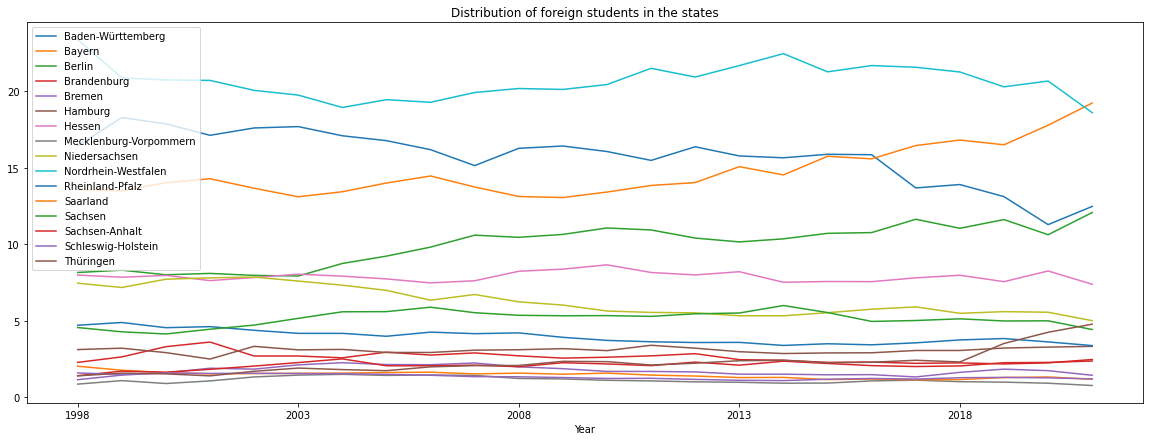

In [76]:
dftotal_nomalised2.plot(figsize=(20,7), title='Distribution of foreign students in the states')

# **6.2 Conclusion**

while Berlin has consistently always had the highest (foreign students/total students) ratio, the state with the actual highest percentage of international students Germany-wide is NRW, with Berlin beating Baden Wurttemberg for second place after around 2016-2017, after Baden-Wurttemberg passed that tuition-fees law! Very interesting.

#**7.1 States with most students**

In [77]:
german_unstacked = german.unstack(0)
german_unstacked

State,Baden-Württemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thüringen
Year,,,,,,,,,,,,,,,,
1998,23136,28625,11731,4659,2924,5714,14286,4383,16504,44977,8431,2093,13587,5938,4603,5881
1999,25763,30694,12136,5000,3254,6057,15146,4791,16990,46469,9006,2111,14379,6384,4710,6533
2000,29087,32501,12805,5286,3633,6380,16304,5048,18577,49724,10158,2352,15161,6756,5238,7528
2001,31856,35118,13721,5514,4273,6678,18391,4524,20702,55153,10860,2557,15867,6795,5846,7738
2002,32212,36413,13257,5566,4316,7376,19400,4503,20833,56448,10948,2665,16200,6428,5914,7574
2003,34371,39718,12731,5995,4419,7237,21854,5717,22164,57868,10326,2819,17540,8748,6059,7749
2004,32192,38114,11305,5779,4325,6819,20888,5823,19640,56080,10462,2456,16111,8178,5904,7575
2005,31956,39111,11427,5433,4108,7021,21301,5020,18912,58482,10250,2641,15643,6827,6140,7727
2006,31503,40448,12094,5668,3765,7203,20120,5249,18698,54110,10566,2560,14525,6841,6047,7645


In [78]:

total_stack = total.stack()
total_stack['1998'].astype(int).sum() #230670.0
total_by_year2 = total_stack.astype(int).groupby('Year').sum()
total_by_year2

Year
1998    230670
1999    246318
2000    267295
2001    292556
2002    299649
2003    316656
2004    300793
2005    299839
2006    294946
2007    313540
2008    345625
2009    369273
2010    386921
2011    445320
2012    427825
2013    438913
2014    432280
2015    432589
2016    435427
2017    437737
2018    435731
2019    429049
2020    418697
2021    395845
dtype: int64

In [79]:


normalised3_badenw = (german_unstacked['Baden-Württemberg'].astype(float)/total_by_year2.astype(float)* 100).round(2)
normalised3_bayern = (german_unstacked['Bayern'].astype(float)/total_by_year2.astype(float)* 100).round(2)
normalised3_berlin = (german_unstacked['Berlin'].astype(float)/total_by_year2.astype(float)* 100).round(2)
normalised3_brandenburg = (german_unstacked['Brandenburg'].astype(float)/total_by_year2.astype(float)* 100).round(2)
normalised3_bremen = (german_unstacked['Bremen'].astype(float)/total_by_year2.astype(float)* 100).round(2)
normalised3_hamburg = (german_unstacked['Hamburg'].astype(float)/total_by_year2.astype(float)* 100).round(2)
normalised3_hessen = (german_unstacked['Hessen'].astype(float)/total_by_year2.astype(float)* 100).round(2)
normalised3_meckvor = (german_unstacked['Mecklenburg-Vorpommern'].astype(float)/total_by_year2.astype(float)* 100).round(2)
normalised3_ndsachen = (german_unstacked['Niedersachsen'].astype(float)/total_by_year2.astype(float)* 100).round(2)
normalised3_nrw = (german_unstacked['Nordrhein-Westfalen'].astype(float)/total_by_year2.astype(float)* 100).round(2)
normalised3_rhlpf = (german_unstacked['Rheinland-Pfalz'].astype(float)/total_by_year2.astype(float)* 100).round(2)
normalised3_saar = (german_unstacked['Saarland'].astype(float)/total_by_year2.astype(float)* 100).round(2)
normalised3_sachs = (german_unstacked['Sachsen'].astype(float)/total_by_year2.astype(float)* 100).round(2)
normalised3_sacshen_anh =(german_unstacked['Sachsen-Anhalt'].astype(float)/total_by_year2.astype(float)* 100).round(2)
normalised3_schlhol = (german_unstacked['Schleswig-Holstein'].astype(float)/total_by_year2.astype(float)* 100).round(2)
normalised3_thurngn =(german_unstacked['Thüringen'].astype(float)/total_by_year2.astype(float)* 100).round(2)


dftotal_nomalised3 = pd.concat([normalised3_badenw, normalised3_bayern, normalised3_berlin, normalised3_brandenburg, normalised3_bremen, normalised3_hamburg, normalised3_hessen, normalised3_meckvor, 
                               normalised3_ndsachen, normalised3_nrw, normalised3_rhlpf, normalised3_saar, normalised3_sachs, normalised3_sacshen_anh, normalised3_schlhol, normalised3_thurngn
                               ], axis=1)
dftotal_nomalised3.columns = ['Baden-Württemberg',
 'Bayern',
 'Berlin',
 'Brandenburg',
 'Bremen',
 'Hamburg',
 'Hessen',
 'Mecklenburg-Vorpommern',
 'Niedersachsen',
 'Nordrhein-Westfalen',
 'Rheinland-Pfalz',
 'Saarland',
 'Sachsen',
 'Sachsen-Anhalt',
 'Schleswig-Holstein',
 'Thüringen']

dftotal_nomalised3

,Baden-Württemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thüringen
Year,,,,,,,,,,,,,,,,
1998,10.03,12.41,5.09,2.02,1.27,2.48,6.19,1.90,7.15,19.50,3.66,0.91,5.89,2.57,2.00,2.55
1999,10.46,12.46,4.93,2.03,1.32,2.46,6.15,1.95,6.90,18.87,3.66,0.86,5.84,2.59,1.91,2.65
2000,10.88,12.16,4.79,1.98,1.36,2.39,6.10,1.89,6.95,18.60,3.80,0.88,5.67,2.53,1.96,2.82
2001,10.89,12.00,4.69,1.88,1.46,2.28,6.29,1.55,7.08,18.85,3.71,0.87,5.42,2.32,2.00,2.64
2002,10.75,12.15,4.42,1.86,1.44,2.46,6.47,1.50,6.95,18.84,3.65,0.89,5.41,2.15,1.97,2.53
2003,10.85,12.54,4.02,1.89,1.40,2.29,6.90,1.81,7.00,18.27,3.26,0.89,5.54,2.76,1.91,2.45
2004,10.70,12.67,3.76,1.92,1.44,2.27,6.94,1.94,6.53,18.64,3.48,0.82,5.36,2.72,1.96,2.52
2005,10.66,13.04,3.81,1.81,1.37,2.34,7.10,1.67,6.31,19.50,3.42,0.88,5.22,2.28,2.05,2.58
2006,10.68,13.71,4.10,1.92,1.28,2.44,6.82,1.78,6.34,18.35,3.58,0.87,4.92,2.32,2.05,2.59


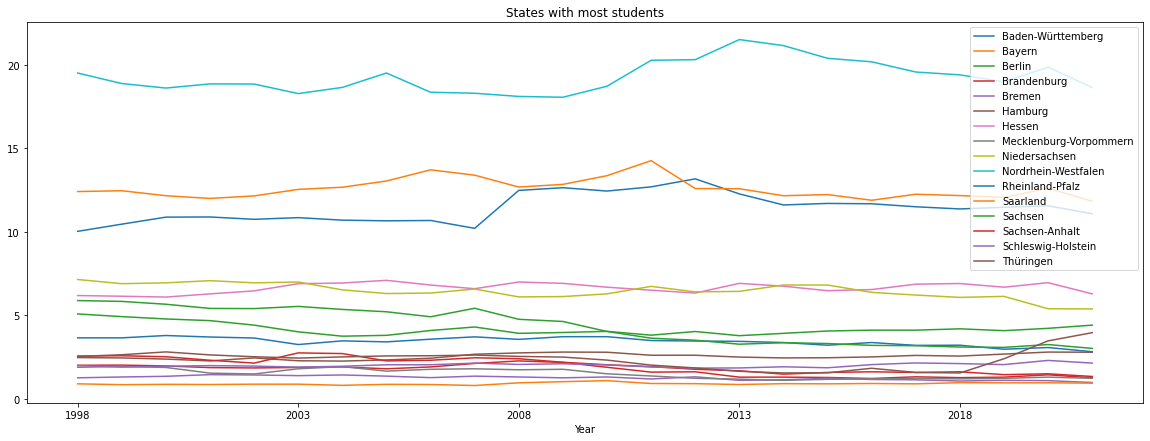

In [80]:
dftotal_nomalised3.plot(figsize=(20,7), title='States with most students')

# **7.2 Conclusion**

**top 3 states with most students : NRW- Bayern- Baden**

In [81]:
dftotal_nomalised3.to_csv('dftotal_nomalised3.csv')